# Assignment: Trees
Do three questions.

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?


Trees are "grown" by splitting the data based on certain characteristics or variables with certain cut off points then evaluating how effective the split was at dividing the data into useful groups where the data within each group is similar (i.e. most pure). 


2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees naturally represent non-linear relationships through hierarchical splits, and interactions are automatically captured since each subsequent split is dependent upon the higher level ones, whereas linear models assume a linear relationship and require feature engineering (ie polynomial or interaction terms) in order to model more complex relationships. 


3. Why is the Gini a good loss function for categorical target variables? 


Gini is a good measure of impurity within splits, and comparing the Gini coefficient of various trial splits allows the tree to maximize purity effectively. Its advantages include simplicity (and speed), and its sensitivity to the data helps with overall model accuracy (it will prioritize splits that separate off the largest class).


4. Why do trees tend to overfit, and how can this tendency be constrained? 


The basic structure of trees (i.e. hierarchical, recursive partitioning) is a greedy algorithm, which is prone to overfitting - their instability means that they will chase noise in order to make the terminal node classes as pure as possible unless constrained. There are multiple regularization/early stopping rules that can help prevent the tree from overfitting, such as limiting depth, terminal node purity, and terminal node size. 


5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 


This is false - they are well suited to categorical variables, but you can still use a continuous variable and choose a cut off point of where to split by comparing SSE or MSSE.


6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?


Because the algorithm is already greedy in the depth dimension, I think adding an extra dimension of options like "width" (letting it split into more than two branches) would increase the tendency to overfit and chase noise already identified in a previous question. 


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

The tree is probably overfitting if it is very deep (lots of levels), especially if some of the splits do not make sense given the nature of the variables/intuitively don't seem predictive and/or it has very small terminal nodes where it is attempting to split off 1-2 instances to maximize purity. Significant gaps in performance between training and test data also can indicate overfitting because it is too sensitive to the specifics of the training data rather than identifying replicable patterns. It is probably underfitting if it is very shallow (only a few levels) and the terminal levels still have high impurity (i.e. gini) and it is not very accurate on the training data. 

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [174]:
bc = pd.read_csv('/Users/gracesaunders/Documents/GitHub/trees/assignment/data/Breast Cancer METABRIC.csv')
bc.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [175]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19


2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.


In [176]:
vars = bc.loc[:,['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed', 'Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis', 'Overall Survival Status']]
vars = vars.dropna()
X = pd.get_dummies(vars, columns = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed'], drop_first=False)
y = X['Overall Survival Status']
X = X.drop(columns=['Overall Survival Status'])

In [177]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1743
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Tumor Size                                                      1400 non-null   float64
 1   Lymph nodes examined positive                                   1400 non-null   float64
 2   Age at Diagnosis                                                1400 non-null   float64
 3   Tumor Stage_0.0                                                 1400 non-null   bool   
 4   Tumor Stage_1.0                                                 1400 non-null   bool   
 5   Tumor Stage_2.0                                                 1400 non-null   bool   
 6   Tumor Stage_3.0                                                 1400 non-null   bool   
 7   Tumor Stage_4.0                                         


3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 


Accuracy  :  0.625 

col_0                    Deceased  Living
Overall Survival Status                  
Deceased                      103      45
Living                         60      72


[Text(0.6633841036414566, 0.9642857142857143, 'Age at Diagnosis <= 67.58\ngini = 0.489\nsamples = 1120\nvalue = [642, 478]'),
 Text(0.49203431372549017, 0.8928571428571429, 'Lymph nodes examined positive <= 5.5\ngini = 0.498\nsamples = 752\nvalue = [354, 398]'),
 Text(0.5777092086834734, 0.9285714285714286, 'True  '),
 Text(0.34541316526610644, 0.8214285714285714, 'Tumor Size <= 24.5\ngini = 0.492\nsamples = 684\nvalue = [298.0, 386.0]'),
 Text(0.21463585434173668, 0.75, 'Age at Diagnosis <= 54.345\ngini = 0.472\nsamples = 433\nvalue = [165, 268]'),
 Text(0.10644257703081232, 0.6785714285714286, 'Lymph nodes examined positive <= 1.5\ngini = 0.406\nsamples = 198\nvalue = [56, 142]'),
 Text(0.08403361344537816, 0.6071428571428571, 'Tumor Size <= 21.5\ngini = 0.369\nsamples = 168\nvalue = [41, 127]'),
 Text(0.07282913165266107, 0.5357142857142857, 'Tumor Size <= 17.5\ngini = 0.391\nsamples = 150\nvalue = [40.0, 110.0]'),
 Text(0.04481792717086835, 0.4642857142857143, 'Chemotherapy_Yes <= 

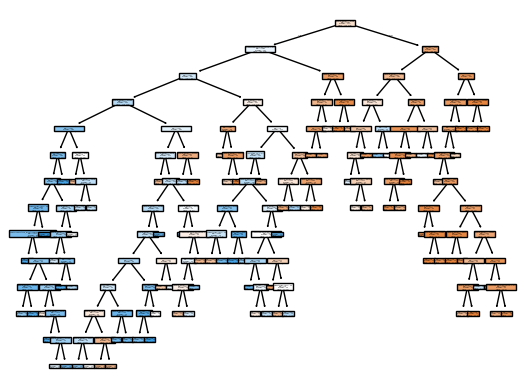

In [178]:
from sklearn import tree # Import the tree classifier
from sklearn.tree import plot_tree # Import the dendrogram plotter
from sklearn.model_selection import train_test_split # Train/test splitter

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=104)

cart = tree.DecisionTreeClassifier(min_samples_leaf = 10) # Create a classifier object

cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)

## Confusion Matrix:
print('Accuracy  : ', cart.score(X_test, y_test), '\n')
print(pd.crosstab(y_test,y_hat))

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 



4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?


In [179]:
TP = 104 # correctly predicted deceased
FN = 44 # incorrectly predicted living
FP = 61 # incorrectly predicted deceased
TN = 71 # correctly predicted living
TPR = TP/(TP+FN) # True Positive Rate
TNR = TN/(TN+FP) # True Negative Rate

print('Sensitivity:', TPR,'(True Positive Rate)')
print('Specificity:', TNR,'(True Negative Rate)')

Sensitivity: 0.7027027027027027 (True Positive Rate)
Specificity: 0.5378787878787878 (True Negative Rate)


In [180]:
# yes, the true positive rate is higher, meaning it is better at predicting the positive class (deceased) than the negative class (living).


5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [181]:
vars = bc.loc[:,['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed', 'Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis', 'Overall Survival (Months)']]
vars = vars.dropna()
X = pd.get_dummies(vars, columns = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed'], drop_first=False)
y = X['Overall Survival (Months)']
X = X.drop(columns=['Overall Survival (Months)'])

Rsq  :  0.012535238940612481 



[Text(0.6, 0.9166666666666666, 'Lymph nodes examined positive <= 1.5\nsquared_error = 6090.912\nsamples = 1120\nvalue = 126.582'),
 Text(0.4, 0.75, 'Age at Diagnosis <= 70.925\nsquared_error = 5946.739\nsamples = 797\nvalue = 140.204'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'Tumor Size <= 23.5\nsquared_error = 6270.987\nsamples = 634\nvalue = 148.694'),
 Text(0.2, 0.4166666666666667, 'Age at Diagnosis <= 50.705\nsquared_error = 5960.556\nsamples = 414\nvalue = 161.315'),
 Text(0.1, 0.25, 'squared_error = 6419.695\nsamples = 124\nvalue = 173.21'),
 Text(0.3, 0.25, 'Age at Diagnosis <= 61.04\nsquared_error = 5677.862\nsamples = 290\nvalue = 156.228'),
 Text(0.2, 0.08333333333333333, 'squared_error = 6451.739\nsamples = 141\nvalue = 147.752'),
 Text(0.4, 0.08333333333333333, 'squared_error = 4813.188\nsamples = 149\nvalue = 164.25'),
 Text(0.4, 0.4166666666666667, 'squared_error = 5991.401\nsamples = 220\nvalue = 124.945'),
 Text(0.5, 0.5833333333333334,

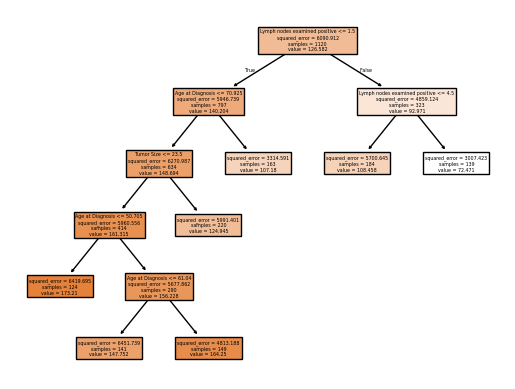

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

cart = tree.DecisionTreeRegressor(min_samples_leaf = 118)

cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)
print('Rsq  : ', cart.score(X_test, y_test), '\n')

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 

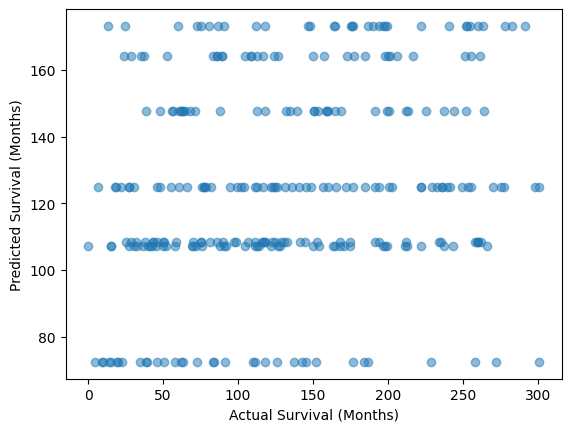

In [183]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel('Actual Survival (Months)')
plt.ylabel('Predicted Survival (Months)')
plt.show()

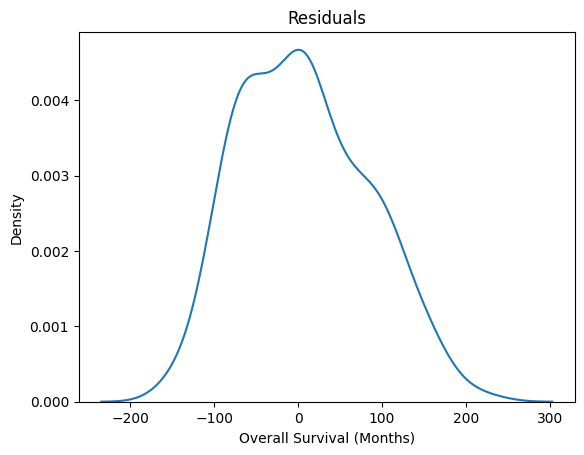

In [184]:
# the scatterplot shows no identifiable pattern, meaning the model is not predicting well (which makes sense with such a low R^2 value).
# plotting residuals to see if there are any patterns in the errors
e = y_test - y_hat
sns.kdeplot(e).set(title='Residuals') 
plt.show()


In [185]:
y.describe()

count    1400.000000
mean      127.848048
std        77.944790
min         0.100000
25%        61.900000
50%       117.583333
75%       189.050000
max       351.000000
Name: Overall Survival (Months), dtype: float64

In [186]:
# I would definitely not support using this model for clinical purposes, 
# because it is not very accurate - a different kind of model would be a better fit
# maybe the first model on binary death prediction would be ok to use, 
# since it has a higher accuracy and it has a 70% true positive rate for predicting death outcomes
# so potentially could be used to treat those patients sooner/better so that they could live longer
# but the second model is not good enough to use for predicting survival time

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.


In [187]:
cc = pd.read_parquet('/Users/gracesaunders/Documents/GitHub/trees/assignment/data/creditcard_fraud_0.parquet')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?


In [188]:
cc['Class'].value_counts()

Class
0    9962
1      38
Name: count, dtype: int64

In [189]:
print((38/(9962+38))*100, "% fraudulent", sep='') 

0.38% fraudulent


<Axes: xlabel='Class', ylabel='Count'>

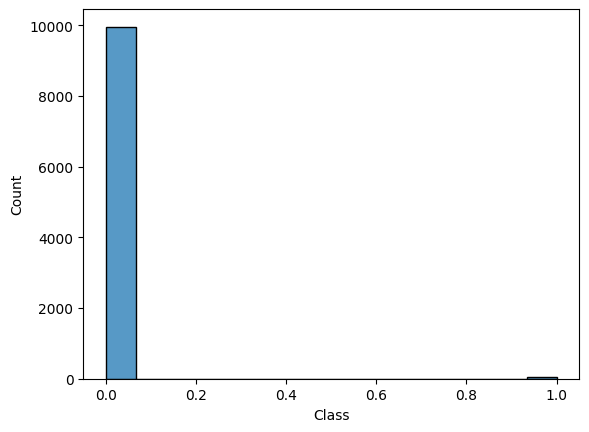

In [190]:
sns.histplot(cc['Class'])


3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.


In [191]:
cc = cc.drop(columns=['Time'])

y = cc['Class']
X = cc.drop(['Class'], axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

## Fit the Model:
from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.9995 



col_0,0,1
Class,,
0,1995,0
1,1,4



4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?


1) money saved that should be saved (true positives): 4 transactions correctly labeled as 1
2) money lost to fraud anyways (false negatives): 1 transaction incorrectly labeled as 0
3) money withheld in error (false positives): 0 transactions incorrectly labeled as 1

Out of a 2000 transaction test set where 5 transactions were fraudulent, I'd say an 80% success rate at identifying fraud is pretty good. Especially considering that there were zero false positives, I don't see any reason why this system wouldn't be beneficial. A better model might be able to detect more than 80% of fraud correctly to save more money for the credit card company, but this one wouldn't cause any customer inconvenience by blocking transactions in error so I think it would be a good idea, if the options were this or nothing/a worse performing model. 


5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


In [192]:
cc['Loss'] = cc['Class']*cc['Amount']
X = X.drop(columns=['Amount'])
y=cc['Loss']

In [193]:
## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

## Fit the Model:
from sklearn import tree # Import the tree 
cart = tree.DecisionTreeRegressor() # Create a regressor object
cart = cart.fit(X_train, y_train) # Fit the regressor

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq)
print('RMSE: ', RMSE)

Rsq:  -0.0004884797184505629
RMSE:  11.828799600973888


<Axes: xlabel='Loss'>

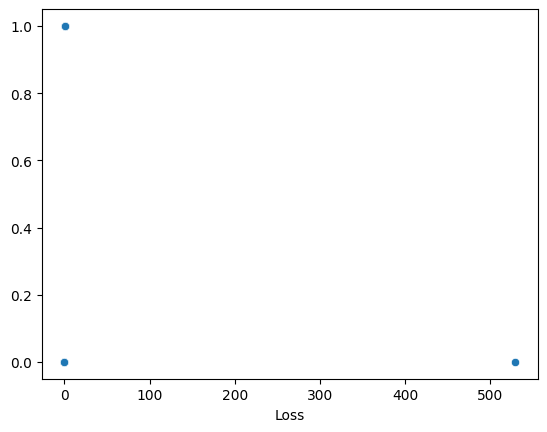

In [194]:
sns.scatterplot(x=y_test, y=y_hat)

At first I thought I had built the tree or made the scatterplot wrong, but from looking at the y_test data, it makes sense why the algorithm wouldn't predict anything other than 0 or 1. There are only 5 fraudulent transactions in the test set, and of those 5, 4 have a Loss value of 1 and 1 had a value of 529. Anything else would have a loss of 0. It would be highly unlikely for it to predict anything higher since only 1/2000 transactions had a loss other than 0 or 1. This tree seems much less useful than the classifier. 

**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?